# Credit Card Fraud Detection Problem

This project will apply 2 machine learning (ML) modeling techniques to recognize fraudulent credit card transactions. The trained model will assess if a credit card transaction is legitimate or not.

In [62]:
# Importing needed Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# !pip install snapml
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, roc_curve, precision_score, recall_score, confusion_matrix
import time
import gc, sys
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

In [2]:
# Loading the dataset
data = pd.read_csv("C:/Users/Idris/OneDrive/Documents/CognitiveClass/creditcard.csv")
print("There are " + str(len(data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(data.columns)) + " variables in the dataset.")

# display the first rows in the dataset
data.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Practically, we will deal with a more volumenous dataset due to the field (banking) which usually involve a lot of records. Thus, we will inflate this data to 10* original size

In [3]:
n_inflation = 10

# Inflate the original dataset
inflated_data = pd.DataFrame(np.repeat(data.values, n_inflation, axis = 0), columns= data.columns)

print("There are " + str(len(inflated_data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(inflated_data.columns)) + " variables in the dataset.")

# display the first rows in the dataset
inflated_data.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


### Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Check for missing columns
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Next is to identify the target label as well as features which will be used for prediction

In [7]:
# How many target labels do we have?
labels = inflated_data.Class.unique()

In [8]:
# Get the count of each class
sizes = inflated_data.Class.value_counts()

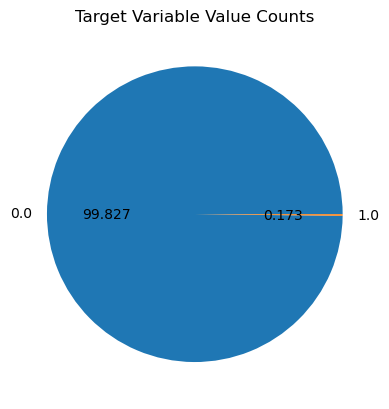

In [9]:
# Visualize the count of each class in the entire dataset

fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct='%.3f')
ax.set_title('Target Variable Value Counts')
plt.show()

As seen above, the Class Variable (target label) has two (2) values. 

- 0 means the transaction isnt fraudulent
- 1 means the transaction is fraudulent

Next, we explore the amount for each transaction. Since its a continuous numerical variable, we will use a distribution plot such as histogram or box plot. To better simplify this, we will create a function for re-useability

In [10]:
def show_distribution(var):

    # Get statistics
    min_val = inflated_data[var].min()
    max_val = inflated_data[var].max()
    mean_val = inflated_data[var].mean()
    med_val = inflated_data[var].median()
    mod_val = inflated_data[var].mode()[0]


    print("Minimum: {:.2f}\nMaximum: {:.2f}\nMean: {:.2f}\nMedian: {:.2f}\nMode: {:.2f}\n".format(
    min_val, max_val, mean_val, med_val, mod_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (9,12))

    # plot an histogram
    ax[0].hist(inflated_data[var], facecolor = "b")
    ax[0].set_ylabel('Frequency')
    ax[0].set_xlabel(var)

    # Add lines for the statistics
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

 

    # Add a title to the Figure
    fig.suptitle('Data Distribution of ' + var)
    
    # create boxplot
    ax[1].boxplot(inflated_data[var], vert = False)
    ax[1].set_xlabel(var)

    
    # Show the figure
    fig.show()

Minimum: 0.00
Maximum: 25691.16
Mean: 88.35
Median: 22.00
Mode: 1.00



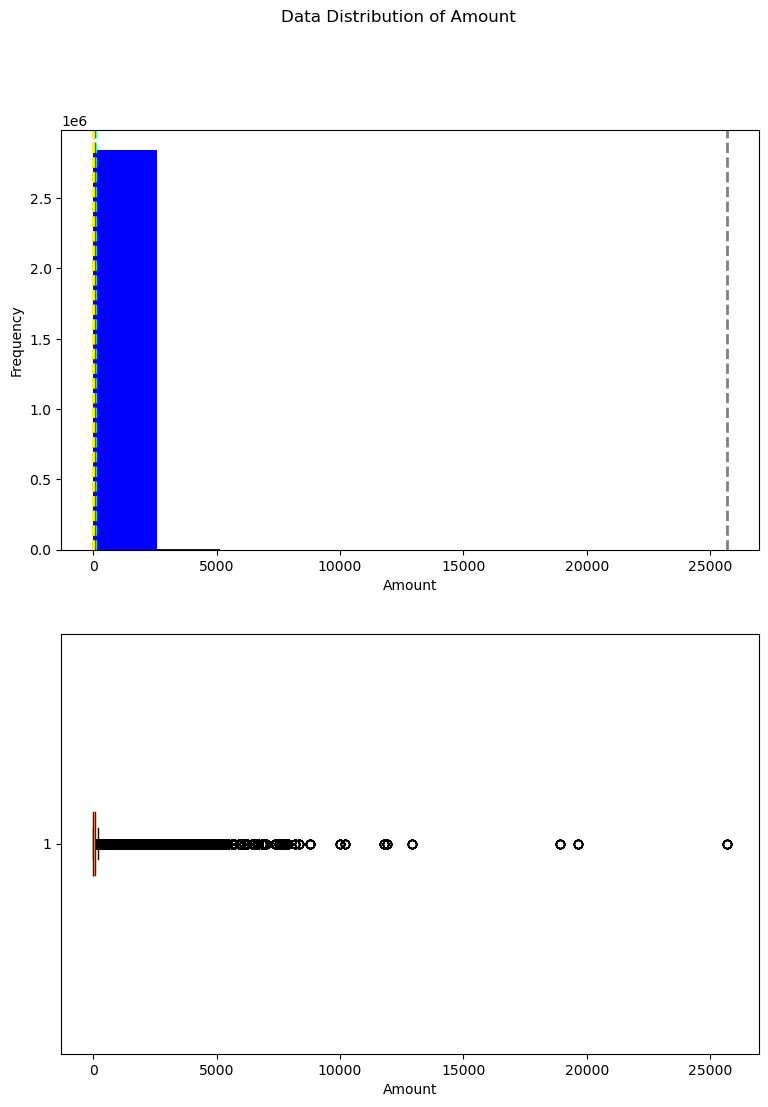

In [11]:
show_distribution("Amount")

We see that it is highly skewed. Lets check the Quartiles. Again, we deploy a function for code reusuability

In [12]:
def what_quantiles(var):
    quantiles = [1, 25, 75, 90, 99]
    for i in quantiles:
        n_quantile = inflated_data[var].quantile(i/100)
        print("{}th Quantile: {}".format(i, n_quantile))
        
# We can also use np.percentile(value_array, percentile)

In [13]:
what_quantiles("Amount")

1th Quantile: 0.12
25th Quantile: 5.6
75th Quantile: 77.17
90th Quantile: 203.0
99th Quantile: 1018.0


We see from above that there are quite a bunch of outliers. Lets take a look at the values > than the 99th Percentile and recreate the distribution chart

In [14]:
# Filter out the outliers
q99 = inflated_data.Amount.quantile(0.99)

q99_data = inflated_data[inflated_data.Amount <= q99]

In [15]:
q99_data.shape

(2819600, 31)

Text(0.5, 0, 'Amount')

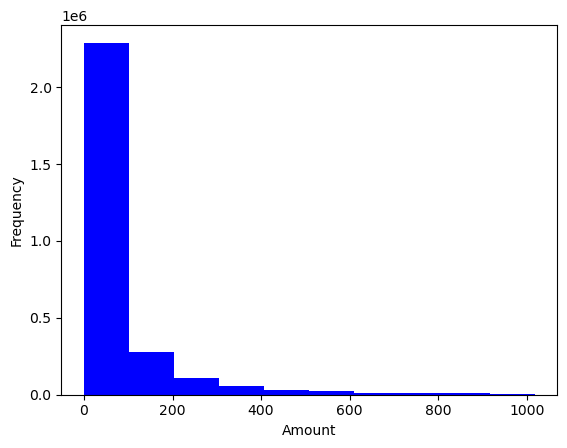

In [16]:
 # plot an histogram
plt.hist(q99_data["Amount"], facecolor = "b")
plt.ylabel('Frequency')
plt.xlabel("Amount")

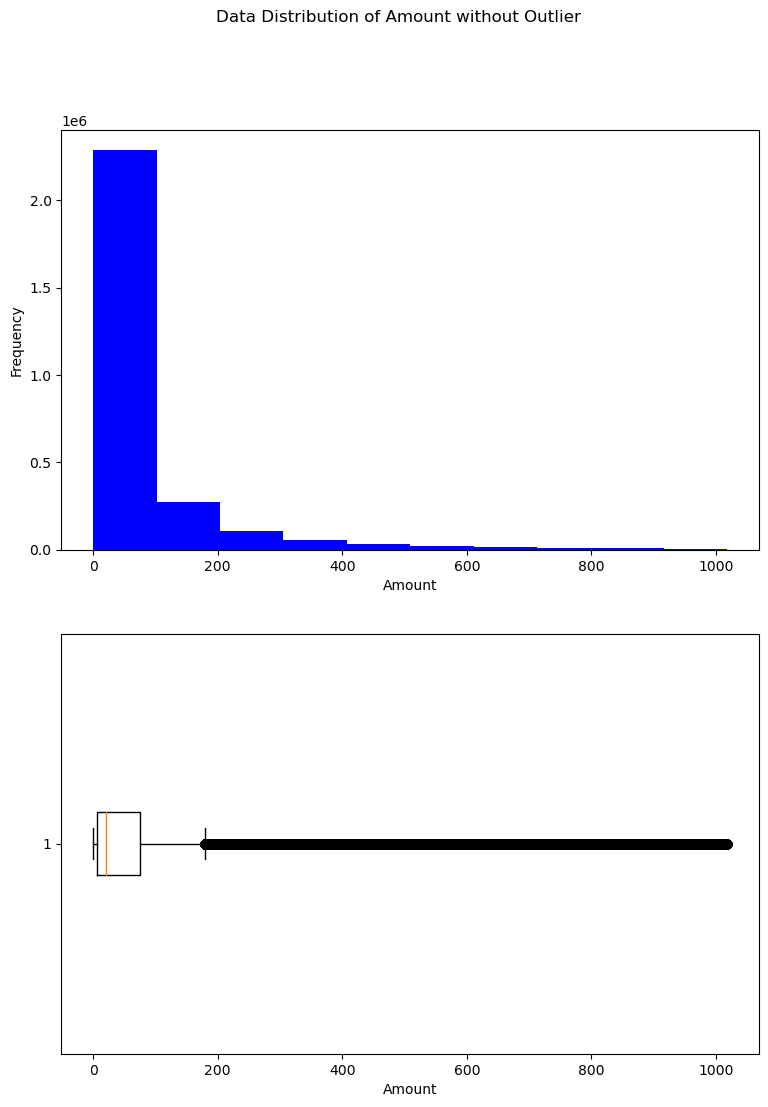

In [17]:
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# plot an histogram
ax[0].hist(q99_data["Amount"], facecolor = "b")
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel("Amount")

# Add a title to the Figure
fig.suptitle('Data Distribution of ' + "Amount without Outlier")

# create boxplot
ax[1].boxplot(q99_data["Amount"], vert = False)
ax[1].set_xlabel("Amount")


# Show the figure
fig.show()

Now, we see clearear a positive skewed dataset

### Data Preprocessing

Since we dont have any categorical data, we can only apply numerical transformations. Lets take a look at the scale.

In [18]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


We see that the mean/ range varies across the variables. For instance, "Amount" has a mean value of $88 while "Time" has a mean value of 94813 secs. Lets apply some transformation

## Split Data 

Lets create the feature matrix "X" and target vector "y" which is "Class"

In [19]:
target = "Class"
y = inflated_data[target]
X = inflated_data.iloc[:, 0:30]

print("X.shape =", X.shape, "y.shape = ", y.shape)

X.shape = (2848070, 30) y.shape =  (2848070,)


We are dealing with large dataset. In order not to run out of memeory, lets release memory used to hold dataset we arent using

In [20]:
del q99_data
del data
gc.collect()

8881

In [21]:
# Split data into train and tests
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state= 0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 1993648 rows
Test Set: 854422 rows


### Build Models

Let's try a couple of models to determine the optimal model. We start with Logistic Regression:

### Logistic Regression 

In [22]:
numeric_features = [*range(0, 29)]
reg = 0.01
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ])

# Create Preprocessing and training pipeline
logistic_model = Pipeline(steps= [
    ("preprocessor", preprocessor),
    ("regressor", LogisticRegression(C=1/reg, solver="lbfgs", multi_class='auto', max_iter=10000))
     ])


In [23]:
logistic_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28])])),
                ('regressor', LogisticRegression(C=100.0, max_iter=10000))])

Model and predict the Test data

In [24]:
X_test_predictions = logistic_model.predict(X_test)
print('Predicted labels: ', X_test_predictions)
print('Actual labels:' ,y_test)

Predicted labels:  [0. 0. 0. ... 0. 0. 0.]
Actual labels: 2793328    0.0
72421      0.0
1468709    0.0
1868032    0.0
1696861    0.0
          ... 
2828606    0.0
2701162    0.0
600622     0.0
1537837    0.0
1110162    0.0
Name: Class, Length: 854422, dtype: float64


Model and predict the Training data

In [25]:
X_train_predictions = logistic_model.predict(X_train)
print('Predicted X_train_labels: ', X_train_predictions)
print('Actual labels:' ,y_test)

Predicted X_train_labels:  [0. 0. 0. ... 0. 0. 0.]
Actual labels: 2793328    0.0
72421      0.0
1468709    0.0
1868032    0.0
1696861    0.0
          ... 
2828606    0.0
2701162    0.0
600622     0.0
1537837    0.0
1110162    0.0
Name: Class, Length: 854422, dtype: float64


In [26]:
print('Accuracy on Training Data: ', accuracy_score(X_train_predictions, y_train))

print('Accuracy on Test Data: ', accuracy_score(X_test_predictions, y_test))

Accuracy on Training Data:  0.9992180164201504
Accuracy on Test Data:  0.9992263775979551


### Create a Function to improve the model process 

In [27]:
def create_model_and_score(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state= 0)
    numeric_features = [*range(0, 29)]
    reg = 0.01
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features)
        ])

    # Create Preprocessing and training pipeline
    model = Pipeline(steps= [
        ("preprocessor", preprocessor),
        ("regressor", LogisticRegression(C=1/reg, solver="lbfgs", multi_class='auto', max_iter=10000))
         ])

    # Fit the model
    model.fit(X_train, y_train)
    
    # Model and predict the Test data
    X_test_predictions = model.predict(X_test)
    print('Predicted labels: ', X_test_predictions)
    print('Actual labels:' ,y_test)
    print("\n")
    # Model and predict the Training data
    X_train_predictions = model.predict(X_train)
    print('Predicted X_train_labels: ', X_train_predictions)
    print('Actual labels:' ,y_test)
    print("\n")
    # Results
    print('Accuracy on Training Data: ', accuracy_score(X_train_predictions, y_train))

    print('Accuracy on Test Data: ', accuracy_score(X_test_predictions, y_test))

Use function to repeat the process of prediction

In [28]:
create_model_and_score(X, y)

Predicted labels:  [0. 0. 0. ... 0. 0. 0.]
Actual labels: 2793328    0.0
72421      0.0
1468709    0.0
1868032    0.0
1696861    0.0
          ... 
2828606    0.0
2701162    0.0
600622     0.0
1537837    0.0
1110162    0.0
Name: Class, Length: 854422, dtype: float64


Predicted X_train_labels:  [0. 0. 0. ... 0. 0. 0.]
Actual labels: 2793328    0.0
72421      0.0
1468709    0.0
1868032    0.0
1696861    0.0
          ... 
2828606    0.0
2701162    0.0
600622     0.0
1537837    0.0
1110162    0.0
Name: Class, Length: 854422, dtype: float64


Accuracy on Training Data:  0.9992180164201504
Accuracy on Test Data:  0.9992263775979551


In [29]:
print(classification_report(y_test, X_test_predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    852976
         1.0       0.88      0.63      0.73      1446

    accuracy                           1.00    854422
   macro avg       0.94      0.82      0.87    854422
weighted avg       1.00      1.00      1.00    854422



In [30]:
print("Overall Accuracy:",accuracy_score(y_test, X_test_predictions))
print("Overall Precision:",precision_score(y_test, X_test_predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, X_test_predictions, average='macro'))

Overall Accuracy: 0.9992263775979551
Overall Precision: 0.9382083659747298
Overall Recall: 0.8156234471421422


In [31]:
# Print the confusion matrix
logistic_mcm = confusion_matrix(y_test, X_test_predictions)
print(logistic_mcm)

[[852848    128]
 [   533    913]]


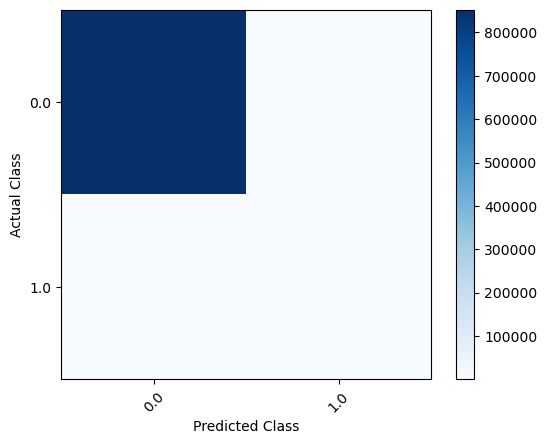

In [32]:
plt.imshow(logistic_mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

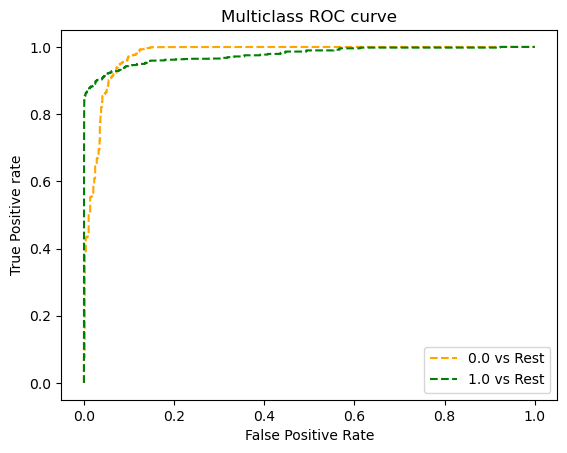

In [33]:
# Get class probability scores
fraud_prob = logistic_model.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(labels)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, fraud_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= str(labels[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label= str(labels[1]) + ' vs Rest')
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label= wine_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [34]:
auc = roc_auc_score(y_test, fraud_prob[:, -1:], multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9769793058830939


### Logistic Regression with sampled weights 

Note: As we can see, this data set is imbalance as we have over 90% of the non-fraudulent transactions. It can also be seen in the confusion matrix. Thus, we need to resample the data by modifying the weights (https://towardsdatascience.com/why-weight-the-importance-of-training-on-balanced-datasets-f1e54688e7df)

In [35]:
# resample the class data by calculating the balanced class weights
w_train = compute_sample_weight('balanced', y_train)
w_train

array([0.50087279, 0.50087279, 0.50087279, ..., 0.50087279, 0.50087279,
       0.50087279])

In [36]:
#Build Transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ])

# Create Preprocessing and training pipeline
sampled_L_model = Pipeline(steps= [
    ("preprocessor", preprocessor),
    ("regressor", LogisticRegression(C=1/reg, solver="lbfgs", multi_class='auto', max_iter=10000))
     ])

In [37]:
# Fit the model
sampled_L_model.fit(X_train, y_train, regressor__sample_weight = w_train) # or **{'regressor__sample_weight': w_train}

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28])])),
                ('regressor', LogisticRegression(C=100.0, max_iter=10000))])

In [38]:
# Model and predict the Test data
X_test_predictions_sampled = sampled_L_model.predict(X_test)
print('Predicted labels: ', X_test_predictions_sampled)
print('Actual labels:' ,y_test)

Predicted labels:  [0. 0. 0. ... 0. 0. 0.]
Actual labels: 2793328    0.0
72421      0.0
1468709    0.0
1868032    0.0
1696861    0.0
          ... 
2828606    0.0
2701162    0.0
600622     0.0
1537837    0.0
1110162    0.0
Name: Class, Length: 854422, dtype: float64


In [39]:
# Model and predict the Training data
X_train_predictions_sampled = sampled_L_model.predict(X_train)
print('Predicted X_train_labels: ', X_train_predictions_sampled)
print('Actual labels:' ,y_test)

Predicted X_train_labels:  [0. 0. 0. ... 0. 0. 0.]
Actual labels: 2793328    0.0
72421      0.0
1468709    0.0
1868032    0.0
1696861    0.0
          ... 
2828606    0.0
2701162    0.0
600622     0.0
1537837    0.0
1110162    0.0
Name: Class, Length: 854422, dtype: float64


In [40]:
print('Accuracy on Training Data: ', accuracy_score(X_train_predictions_sampled, y_train))

print('Accuracy on Test Data: ', accuracy_score(X_test_predictions_sampled, y_test))

Accuracy on Training Data:  0.9781480983603926
Accuracy on Test Data:  0.9781548227924842


This balanced class data will be used to build a model function "create_model_and_score_sampled".

In [41]:
# def create_model_and_score_sampled(X, y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state= 0)
#     numeric_features = [*range(0, 29)]
#     reg = 0.01
    
#     # resample the class data by calculating the balanced class weights
#     w_train = compute_sample_weight('balanced', y_train)
    
#     #Build Transformers
#     numeric_transformer = Pipeline(steps=[
#         ('scaler', StandardScaler())])

#     preprocessor = ColumnTransformer(
#         transformers=[
#             ("num", numeric_transformer, numeric_features)
#         ])

#     # Create Preprocessing and training pipeline
#     model = Pipeline(steps= [
#         ("preprocessor", preprocessor),
#         ("regressor", LogisticRegression(C=1/reg, solver="lbfgs", multi_class='auto', max_iter=10000))
#          ])

#     # Fit the model
#     model.fit(X_train, y_train, regressor__sample_weight = w_train) # or **{'regressor__sample_weight': w_train}
    
#     # Model and predict the Test data
#     X_test_predictions_sampled = model_sampled.predict(X_test)
#     print('Predicted labels: ', X_test_predictions_sampled)
#     print('Actual labels:' ,y_test)
#     print("\n")
    
#     # Model and predict the Training data
#     X_train_predictions_sampled = model_sampled.predict(X_train)
#     print('Predicted X_train_labels: ', X_train_predictions_sampled)
#     print('Actual labels:' ,y_test)
#     print("\n")
#     # Results
#     print('Accuracy on Training Data: ', accuracy_score(X_train_predictions_sampled, y_train))

#     print('Accuracy on Test Data: ', accuracy_score(X_test_predictions_sampled, y_test))

In [42]:
# create_model_and_score_sampled(X, y)

In [43]:
print(classification_report(y_test, X_test_predictions_sampled))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    852976
         1.0       0.07      0.91      0.12      1446

    accuracy                           0.98    854422
   macro avg       0.53      0.94      0.56    854422
weighted avg       1.00      0.98      0.99    854422



In [44]:
print("Overall Accuracy:",accuracy_score(y_test, X_test_predictions_sampled))
print("Overall Precision:",precision_score(y_test, X_test_predictions_sampled, average='macro'))
print("Overall Recall:",recall_score(y_test, X_test_predictions_sampled, average='macro'))

Overall Accuracy: 0.9781548227924842
Overall Precision: 0.533113945609254
Overall Recall: 0.9448738987316603


In [45]:
# Print the confusion matrix
mcm_L_sampled = confusion_matrix(y_test, X_test_predictions_sampled)
print(mcm_L_sampled)

[[834439  18537]
 [   128   1318]]


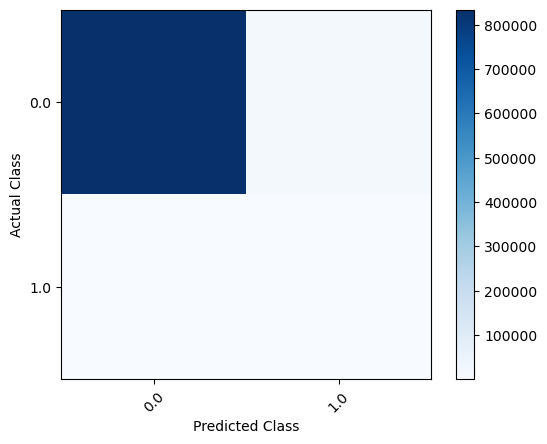

In [46]:
plt.imshow(mcm_L_sampled, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

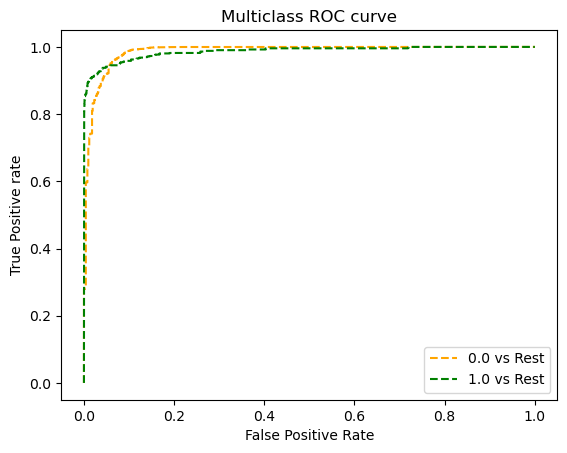

In [47]:
# Get class probability scores
fraud_prob_L2 = sampled_L_model.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(labels)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, fraud_prob_L2[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= str(labels[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label= str(labels[1]) + ' vs Rest')
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label= wine_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [48]:
auc = roc_auc_score(y_test, fraud_prob_L2[:, -1:], multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9863684315142287


### Decision Tree 

In [49]:
#Build Transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ])

# Create Preprocessing and training pipeline
dt_model = Pipeline(steps= [
    ("preprocessor", preprocessor),
    ("decisiontree", DecisionTreeClassifier(max_depth = 4, random_state = 0))
     ])

In [50]:
# Fit the model
dt_model.fit(X_train, y_train, decisiontree__sample_weight = w_train) # or **{'regressor__sample_weight': w_train}

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28])])),
                ('decisiontree',
                 DecisionTreeClassifier(max_depth=4, random_state=0))])

In [51]:
# Model and predict the Test data
X_test_predictions_dt = dt_model.predict(X_test)
print('Predicted labels: ', X_test_predictions_dt)
print('Actual labels:' ,y_test)

Predicted labels:  [0. 0. 0. ... 0. 0. 0.]
Actual labels: 2793328    0.0
72421      0.0
1468709    0.0
1868032    0.0
1696861    0.0
          ... 
2828606    0.0
2701162    0.0
600622     0.0
1537837    0.0
1110162    0.0
Name: Class, Length: 854422, dtype: float64


In [52]:
# Model and predict the Training data
X_train_predictions_dt = dt_model.predict(X_train)
print('Predicted X_train_labels: ', X_train_predictions_dt)
print('Actual labels:' ,y_test)

Predicted X_train_labels:  [0. 0. 0. ... 0. 0. 0.]
Actual labels: 2793328    0.0
72421      0.0
1468709    0.0
1868032    0.0
1696861    0.0
          ... 
2828606    0.0
2701162    0.0
600622     0.0
1537837    0.0
1110162    0.0
Name: Class, Length: 854422, dtype: float64


In [53]:
print('Accuracy on Training Data: ', accuracy_score(X_train_predictions_dt, y_train))

print('Accuracy on Test Data: ', accuracy_score(X_test_predictions_dt, y_test))

Accuracy on Training Data:  0.9660968235114724
Accuracy on Test Data:  0.9665048418697084


In [54]:
print(classification_report(y_test, X_test_predictions_dt))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    852976
         1.0       0.05      0.93      0.09      1446

    accuracy                           0.97    854422
   macro avg       0.52      0.95      0.53    854422
weighted avg       1.00      0.97      0.98    854422



In [55]:
print("Overall Accuracy:",accuracy_score(y_test, X_test_predictions_dt))
print("Overall Precision:",precision_score(y_test, X_test_predictions_dt, average='macro'))
print("Overall Recall:",recall_score(y_test, X_test_predictions_dt, average='macro'))

Overall Accuracy: 0.9665048418697084
Overall Precision: 0.5224899391593937
Overall Recall: 0.9490496967181771


In [56]:
# Print the confusion matrix
mcm_dt = confusion_matrix(y_test, X_test_predictions_dt)
print(mcm_dt)

[[824456  28520]
 [    99   1347]]


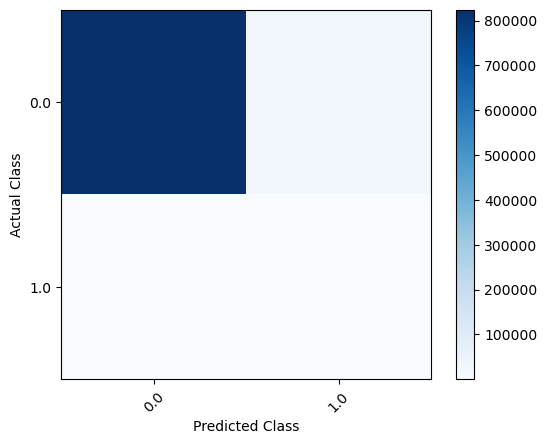

In [57]:
plt.imshow(mcm_dt, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

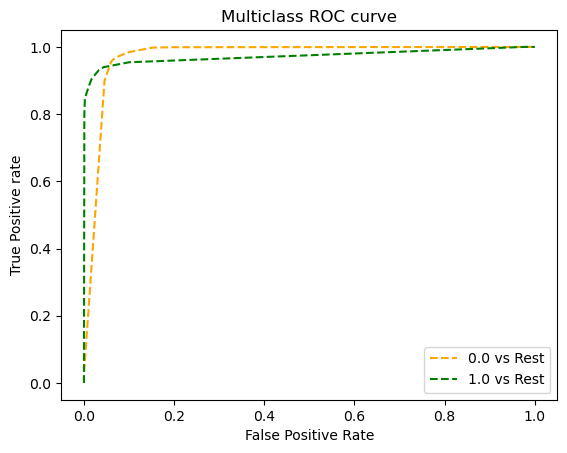

In [58]:
# Get class probability scores
fraud_prob_dt = dt_model.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(labels)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, fraud_prob_dt[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= str(labels[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label= str(labels[1]) + ' vs Rest')
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label= wine_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [59]:
auc = roc_auc_score(y_test, fraud_prob_dt[:, -1:], multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9724464409895658


### Support Vector Machine

The Support Vector Classifier does support initiating the imbalance of the dataset

In [63]:
#Build Transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ])

# Create Preprocessing and training pipeline
model_svc = Pipeline(steps= [
    ("preprocessor", preprocessor),
    ("svm", LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False))
     ])